In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error

### Rumus RMSE

Root Mean Squared Error (RMSE) dapat dihitung dengan rumus:

RMSE = √(Σ(y_i - ŷ_i)² / n)

Di mana:

- RMSE: Root Mean Squared Error
- y_i: Nilai aktual data ke-i
- ŷ_i: Nilai prediksi data ke-i
- n: Jumlah data

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# file_path = '/content/drive/MyDrive/psd/Saham/Tencent.xlsx'
# data = pd.read_excel(file_path)

import pandas as pd

url = 'https://raw.githubusercontent.com/Bima-010/psd/main/datasets/tencent.xlsx'

data = pd.read_excel(url)

In [30]:
print("Nama Kolom dalam Dataset:")
print(data.columns)

Nama Kolom dalam Dataset:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [16]:
print(data.head())

                     Date    Open    High     Low   Close    Volume
0 2019-10-14 16:00:00.288  310.69  314.11  307.84  311.83  24011589
1 2019-10-15 16:00:00.288  312.97  315.06  311.26  312.40  14202519
2 2019-10-16 16:00:00.288  313.54  315.44  311.64  314.49  13953191
3 2019-10-17 16:00:00.288  316.20  316.20  312.02  314.49  10339120
4 2019-10-18 16:00:00.288  315.44  317.53  313.73  314.49   9904468


In [17]:
data.fillna(0, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data.reset_index(drop=True, inplace=True)

In [18]:
def create_supervised_data(data, target_column, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data['Close'].iloc[i:(i + window_size)].values)  # Use 'Close' column for X
        y.append(data[target_column].iloc[i + window_size])  # Access target_column directly from original data
    return np.array(X), np.array(y)

#pqrameter
target_column = 'Open'
window_size = 5


X, y = create_supervised_data(data, target_column, window_size)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1225, 5)
Shape of y: (1225,)


In [19]:
X_df = pd.DataFrame(X, columns=[f'window_{i+1}' for i in range(window_size)])
y_df = pd.DataFrame(y, columns=['open_target'])

result_df = pd.concat([X_df, y_df], axis=1)

print(result_df.head())

   window_1  window_2  window_3  window_4  window_5  open_target
0    311.83    312.40    314.49    314.49    314.49       313.16
1    312.40    314.49    314.49    314.49    308.60       308.79
2    314.49    314.49    314.49    308.60    311.26       308.60
3    314.49    314.49    308.60    311.26    304.04       303.09
4    314.49    308.60    311.26    304.04    303.09       304.42


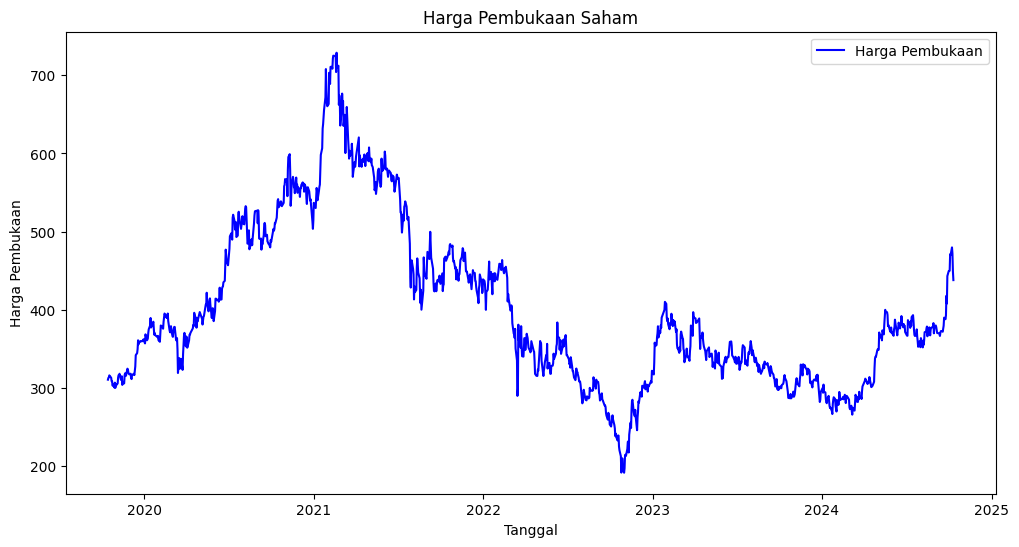

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'], label='Harga Pembukaan', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Harga Pembukaan')
plt.title('Harga Pembukaan Saham')
plt.legend()
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler.fit_transform(X_reshaped)
X_normalized = X_normalized.reshape(X.shape)

# Menampilkan beberapa nilai setelah normalisasi
print("Sample of normalized data:")
print(X_normalized[:5])

Sample of normalized data:
[[0.22521768 0.22627819 0.2301667  0.2301667  0.2301667 ]
 [0.22627819 0.2301667  0.2301667  0.2301667  0.21920816]
 [0.2301667  0.2301667  0.2301667  0.21920816 0.22415718]
 [0.2301667  0.2301667  0.21920816 0.22415718 0.21072412]
 [0.2301667  0.21920816 0.22415718 0.21072412 0.20895661]]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, shuffle=False)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

#regresi linier
linear_model = LinearRegression()
linear_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

#orediksi
y_pred_linear = linear_model.predict(X_test.reshape(X_test.shape[0], -1))

#evaluasi
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("RMSE untuk Regresi Linier:", rmse_linear)

RMSE untuk Regresi Linier: 4.04120563355878


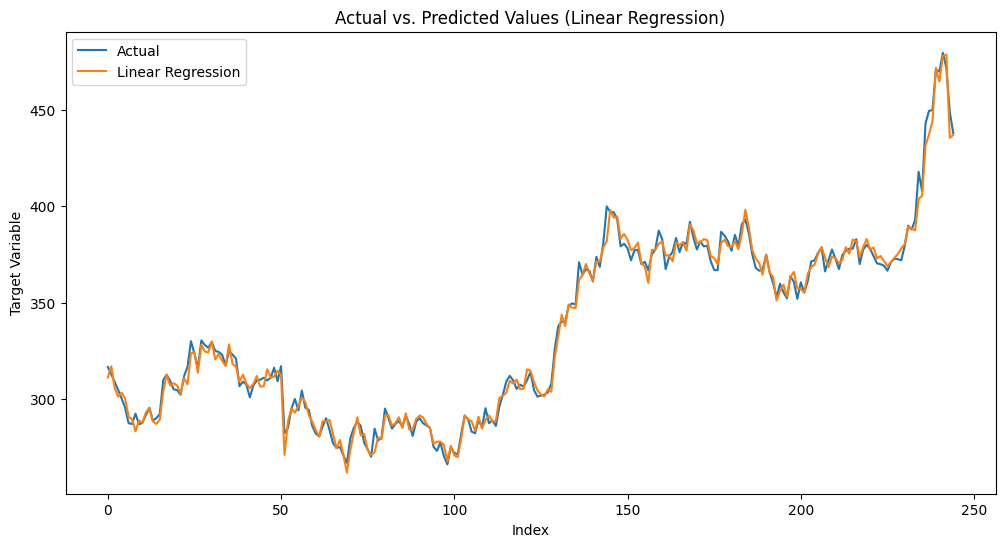

In [24]:
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred_linear

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_linear, label='Linear Regression')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [26]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluasi Model Regresi Linier
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
print("MAE untuk Regresi Linier:", mae_linear)
print("MAPE untuk Regresi Linier: {:.2f}%".format(mape_linear))

MAE untuk Regresi Linier: 3.0665489117238285
MAPE untuk Regresi Linier: 0.91%


In [28]:
import joblib

# Save the linear regression model to a file
joblib.dump(linear_model, 'tencent_uni.pkl')


['tencent_uni.pkl']

Matriks Korelasi:
            Open      High       Low     Close    Volume
Open    1.000000  0.998494  0.998563  0.996969 -0.023150
High    0.998494  1.000000  0.998181  0.998619 -0.004680
Low     0.998563  0.998181  1.000000  0.998619 -0.043245
Close   0.996969  0.998619  0.998619  1.000000 -0.025239
Volume -0.023150 -0.004680 -0.043245 -0.025239  1.000000


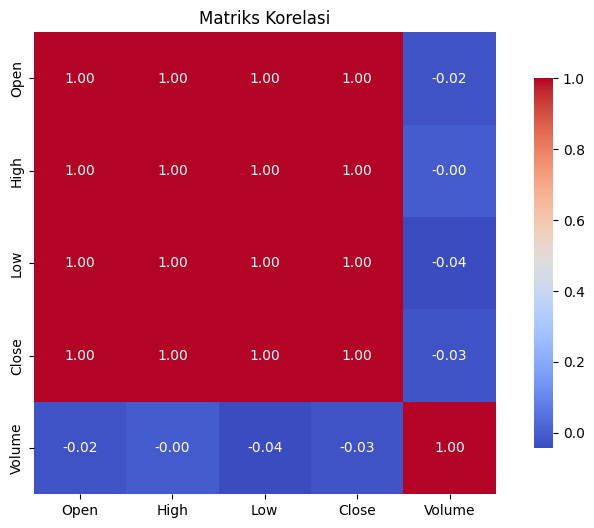

In [ ]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

print("Matriks Korelasi:")
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
high_correlation = correlation_matrix[correlation_matrix.abs() >= 0.7]

print("Atribut dengan korelasi >= 0.7:")
print(high_correlation)

Atribut dengan korelasi >= 0.7:
            Open      High       Low     Close  Volume
Open    1.000000  0.998494  0.998563  0.996969     NaN
High    0.998494  1.000000  0.998181  0.998619     NaN
Low     0.998563  0.998181  1.000000  0.998619     NaN
Close   0.996969  0.998619  0.998619  1.000000     NaN
Volume       NaN       NaN       NaN       NaN     1.0


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Bagging Regressor with Linear Regression as Base Estimator
# Use 'estimator' instead of 'base_estimator' for newer scikit-learn versions
bagging_model = BaggingRegressor(estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred_bagging = bagging_model.predict(X_test.reshape(X_test.shape[0], -1))
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print("RMSE for Bagging Regressor:", rmse_bagging)

RMSE for Bagging Regressor: 4.0507534725568215


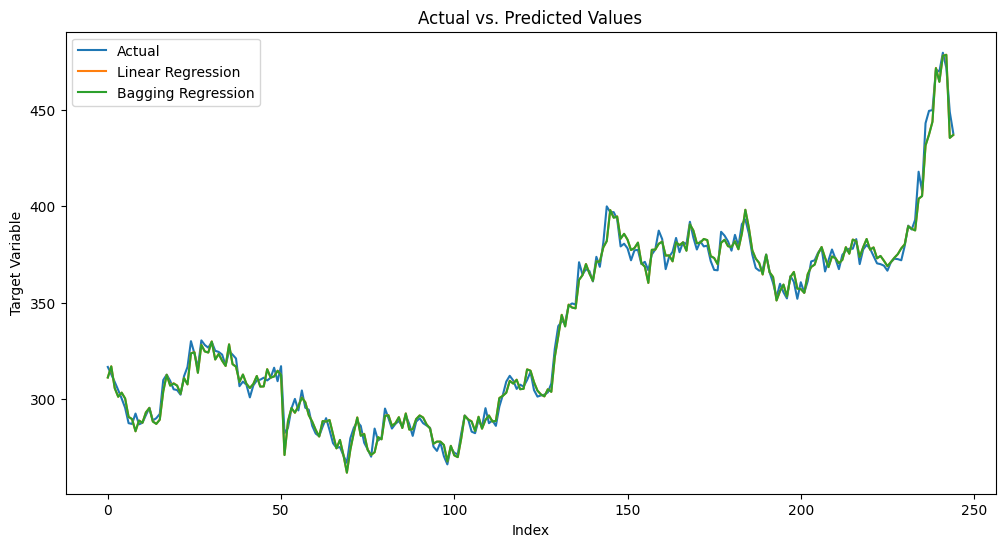

In [ ]:
# Visualize the Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_linear, label='Linear Regression')
plt.plot(y_pred_bagging, label='Bagging Regression')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# ... Your data preparation and training code ...

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred_linear = linear_model.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate metrics for Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

print("Linear Regression:")
print("RMSE:", rmse_linear)
print("MAE:", mae_linear)
print("MAPE:", mape_linear)

# Bagging Regressor with Linear Regression as Base Estimator
bagging_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred_bagging = bagging_model.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate metrics for Bagging Regression
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mape_bagging = mean_absolute_percentage_error(y_test, y_pred_bagging)

print("\nBagging Regression:")
print("RMSE:", rmse_bagging)
print("MAE:", mae_bagging)
print("MAPE:", mape_bagging)

# Visualize the Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_linear, label='Linear Regression')
plt.plot(y_pred_bagging, label='Bagging Regression')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

Linear Regression:
RMSE: 4.04120563355878
MAE: 3.0665489117238285
MAPE: 0.009110598983113342


TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Flatten X_train untuk RandomForest

#prediksi
y_pred_rf = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

#evaluasi
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE untuk Random Forest Regressor:", rmse_rf)

RMSE untuk Random Forest Regressor: 4.599577698170801


In [ ]:
from sklearn.ensemble import BaggingRegressor

#bagging regressor dengan estimator Random Forest
bagging_model = BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=50, random_state=42)
bagging_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

#prediksi
y_pred_bagging = bagging_model.predict(X_test.reshape(X_test.shape[0], -1))

#eval
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print("RMSE untuk Bagging Regressor:", rmse_bagging)

RMSE untuk Bagging Regressor: 4.403260041659485


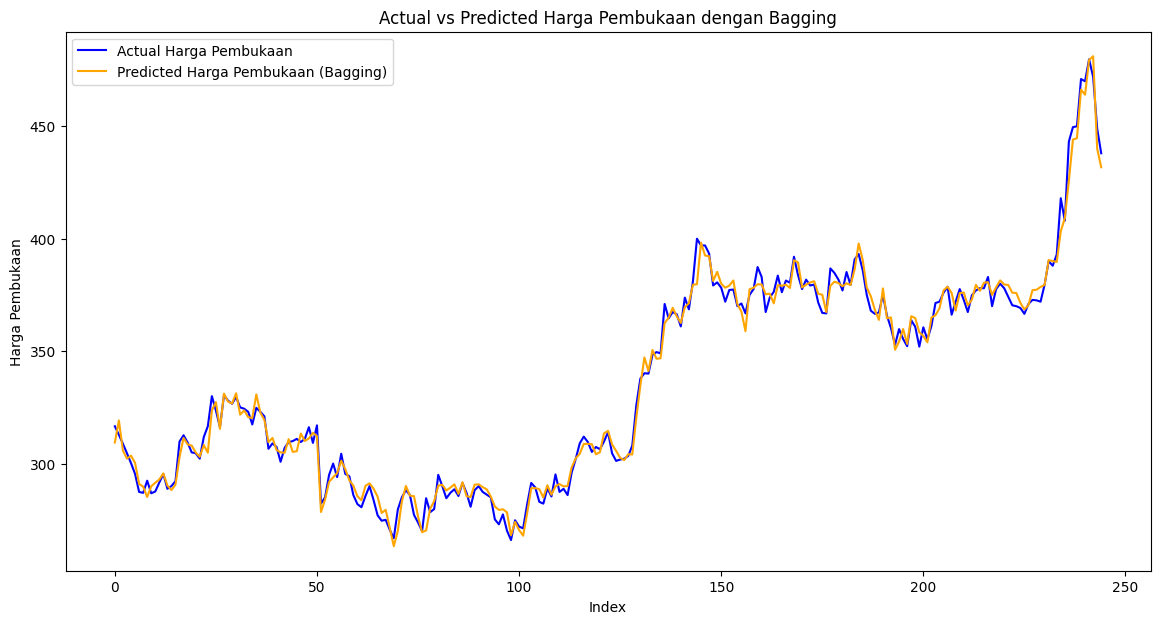

In [ ]:
# Visualisasi Hasil Prediksi untuk Bagging
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual Harga Pembukaan', color='blue')
plt.plot(range(len(y_pred_bagging)), y_pred_bagging, label='Predicted Harga Pembukaan (Bagging)', color='orange')
plt.xlabel('Index')
plt.ylabel('Harga Pembukaan')
plt.title('Actual vs Predicted Harga Pembukaan dengan Bagging')
plt.legend()
plt.show()

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])  # Reshape to (samples, 1, features)


from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # input_shape is now (1, features) or (desired_timesteps, features_per_timestep)
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

#prediksi
y_pred_lstm = lstm_model.predict(X_test)

#eval
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print("RMSE untuk LSTM:", rmse_lstm)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 185060.0625
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 182687.0312
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 183691.2344
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 177066.4531
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163181.7344
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 140255.9688
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103465.7578
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66621.1562
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32963.9922
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15286.2480
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9417.0264
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10012.0996
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8848.8965
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8614.2324
Epoch 15/10

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#gradient boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Flatten X_train untuk Gradient Boosting

#prediksi
y_pred_gb = gb_model.predict(X_test.reshape(X_test.shape[0], -1))

#eval
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print("RMSE untuk Gradient Boosting Regressor:", rmse_gb)


RMSE untuk Gradient Boosting Regressor: 4.723297345658933


In [ ]:
# Fungsi untuk menghitung MAPE dalam persen
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluasi Model Regresi Linier
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
print("MAE untuk Regresi Linier:", mae_linear)
print("MAPE untuk Regresi Linier: {:.2f}%".format(mape_linear))

# Evaluasi Model Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print("MAE untuk Random Forest Regressor:", mae_rf)
print("MAPE untuk Random Forest Regressor: {:.2f}%".format(mape_rf))

# Evaluasi Model Bagging
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mape_bagging = mean_absolute_percentage_error(y_test, y_pred_bagging)
print("MAE untuk Bagging Regressor:", mae_bagging)
print("MAPE untuk Bagging Regressor: {:.2f}%".format(mape_bagging))

# # Evaluasi Model Gradient Boosting
# mae_gb = mean_absolute_error(y_test, y_pred_gb)
# mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)
# print("MAE untuk Gradient Boosting Regressor:", mae_gb)
# print("MAPE untuk Gradient Boosting Regressor: {:.2f}%".format(mape_gb))

# # Evaluasi Model LSTM
# mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
# mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
# print("MAE untuk LSTM:", mae_lstm)
# print("MAPE untuk LSTM: {:.2f}%".format(mape_lstm))


MAE untuk Regresi Linier: 3.0665489117238285
MAPE untuk Regresi Linier: 0.91%
MAE untuk Random Forest Regressor: 3.514566938775515
MAPE untuk Random Forest Regressor: 1.04%
MAE untuk Bagging Regressor: 3.0731754214362565
MAPE untuk Bagging Regressor: 0.91%


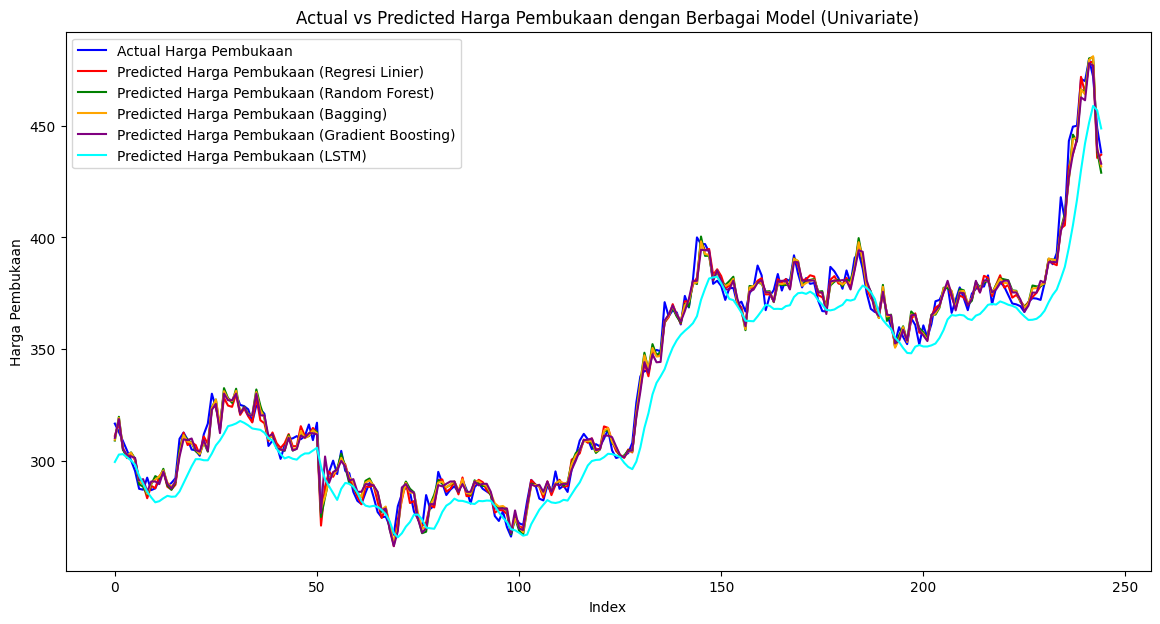

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Hasil Prediksi untuk Semua Model
plt.figure(figsize=(14, 7))

# Actual
plt.plot(range(len(y_test)), y_test, label='Actual Harga Pembukaan', color='blue')

# Prediksi Regresi Linier
plt.plot(range(len(y_pred_linear)), y_pred_linear, label='Predicted Harga Pembukaan (Regresi Linier)', color='red')

# Prediksi Random Forest
plt.plot(range(len(y_pred_rf)), y_pred_rf, label='Predicted Harga Pembukaan (Random Forest)', color='green')

# Prediksi Bagging
plt.plot(range(len(y_pred_bagging)), y_pred_bagging, label='Predicted Harga Pembukaan (Bagging)', color='orange')

# Prediksi Gradient Boosting
plt.plot(range(len(y_pred_gb)), y_pred_gb, label='Predicted Harga Pembukaan (Gradient Boosting)', color='purple')

# Prediksi LSTM
plt.plot(range(len(y_pred_lstm)), y_pred_lstm, label='Predicted Harga Pembukaan (LSTM)', color='cyan')

plt.xlabel('Index')
plt.ylabel('Harga Pembukaan')
plt.title('Actual vs Predicted Harga Pembukaan dengan Berbagai Model (Univariate)')
plt.legend()
plt.show()
